In [1]:
import numpy as np
import pandas as pd

In [2]:
automobili = pd.read_csv("cars.csv", delimiter=";")
automobili.drop(0, inplace=True)
automobili.Horsepower = automobili.Horsepower.astype("float")
automobili.Weight = automobili.Weight.astype("float")

In [3]:
automobili = automobili[["Horsepower", "Weight"]]

In [4]:
automobili.head(3)

,Horsepower,Weight
1,130.0,3504.0
2,165.0,3693.0
3,150.0,3436.0


In [5]:
automobili.tail(3)

,Horsepower,Weight
404,84.0,2295.0
405,79.0,2625.0
406,82.0,2720.0


In [6]:
automobili.corr(numeric_only=True)

,Horsepower,Weight
Horsepower,1.000000,0.840811
Weight,0.840811,1.000000


<Axes: xlabel='Horsepower', ylabel='Weight'>

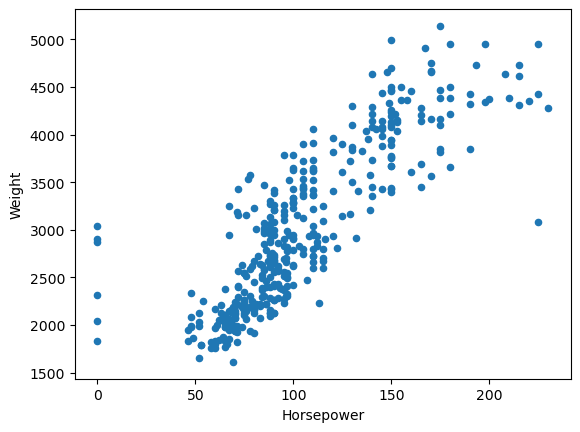

In [7]:
automobili.plot.scatter(x="Horsepower", y="Weight")

In [8]:
automobili = automobili[automobili.Horsepower != 0]
automobili

,Horsepower,Weight
1,130.0,3504.0
2,165.0,3693.0
3,150.0,3436.0
4,150.0,3433.0
5,140.0,3449.0
...,...,...
402,86.0,2790.0
403,52.0,2130.0
404,84.0,2295.0
405,79.0,2625.0


<Axes: xlabel='Horsepower', ylabel='Weight'>

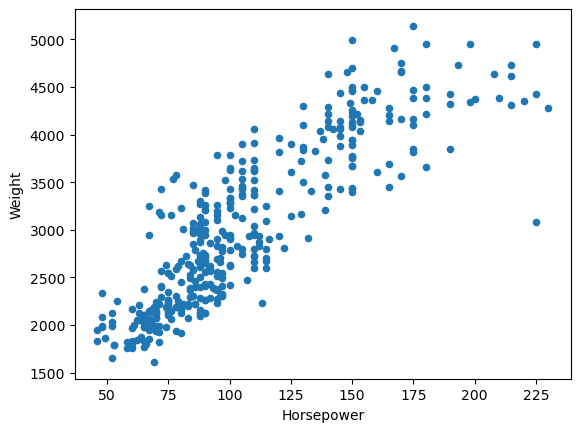

In [9]:
automobili.plot.scatter(x="Horsepower", y="Weight")

In [10]:
automobili.corr(numeric_only=True)

,Horsepower,Weight
Horsepower,1.000000,0.866586
Weight,0.866586,1.000000


In [11]:
A = np.matrix(automobili.Horsepower).transpose()
A.shape

(400, 1)

In [12]:
A

matrix([[130.],
        [165.],
        [150.],
        [150.],
        [140.],
        [198.],
        [220.],
        [215.],
        [225.],
        [190.],
        [115.],
        [165.],
        [153.],
        [175.],
        [175.],
        [170.],
        [160.],
        [140.],
        [150.],
        [225.],
        [ 95.],
        [ 95.],
        [ 97.],
        [ 85.],
        [ 88.],
        [ 46.],
        [ 87.],
        [ 90.],
        [ 95.],
        [113.],
        [ 90.],
        [215.],
        [200.],
        [210.],
        [193.],
        [ 88.],
        [ 90.],
        [ 95.],
        [ 48.],
        [100.],
        [105.],
        [100.],
        [ 88.],
        [100.],
        [165.],
        [175.],
        [153.],
        [150.],
        [180.],
        [170.],
        [175.],
        [110.],
        [ 72.],
        [100.],
        [ 88.],
        [ 86.],
        [ 90.],
        [ 70.],
        [ 76.],
        [ 65.],
        [ 69.],
        [ 60.],
        

In [13]:
A_prosireni = np.hstack((A, np.ones(A.shape)))
A_prosireni
                        

matrix([[130.,   1.],
        [165.,   1.],
        [150.,   1.],
        [150.,   1.],
        [140.,   1.],
        [198.,   1.],
        [220.,   1.],
        [215.,   1.],
        [225.,   1.],
        [190.,   1.],
        [115.,   1.],
        [165.,   1.],
        [153.,   1.],
        [175.,   1.],
        [175.,   1.],
        [170.,   1.],
        [160.,   1.],
        [140.,   1.],
        [150.,   1.],
        [225.,   1.],
        [ 95.,   1.],
        [ 95.,   1.],
        [ 97.,   1.],
        [ 85.,   1.],
        [ 88.,   1.],
        [ 46.,   1.],
        [ 87.,   1.],
        [ 90.,   1.],
        [ 95.,   1.],
        [113.,   1.],
        [ 90.,   1.],
        [215.,   1.],
        [200.,   1.],
        [210.,   1.],
        [193.,   1.],
        [ 88.,   1.],
        [ 90.,   1.],
        [ 95.,   1.],
        [ 48.,   1.],
        [100.,   1.],
        [105.,   1.],
        [100.,   1.],
        [ 88.,   1.],
        [100.,   1.],
        [165.,   1.],
        [1

In [20]:
b = np.matrix(automobili.Weight).transpose()
b.shape


(400, 1)

In [21]:
rank = np.linalg.matrix_rank(A_prosireni)

if rank == min(A_prosireni.shape):
    print("Matrica je punog ranga")
else:

    print("Matrica NIJE punog ranga")

Matrica je punog ranga


In [22]:
psudoinverz_matrice_a_prosireno = np.linalg.inv(A_prosireni.T * A_prosireni) * A_prosireni.T
x= psudoinverz_matrice_a_prosireno * b
x

matrix([[ 18.98726553],
        [991.33567018]])

In [25]:
import matplotlib.pyplot  as plt

y_weight = 18.98726553 * x_horsepower + 991.33567018

In [26]:
def pravac(x_horsepower):
    return float(np.matrix([x_horsepower, 1])* x)

C:\Users\brankor\AppData\Local\Temp\ipykernel_28248\3144655093.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(np.matrix([x_horsepower, 1])* x)


Text(0, 0.5, 'Weight')

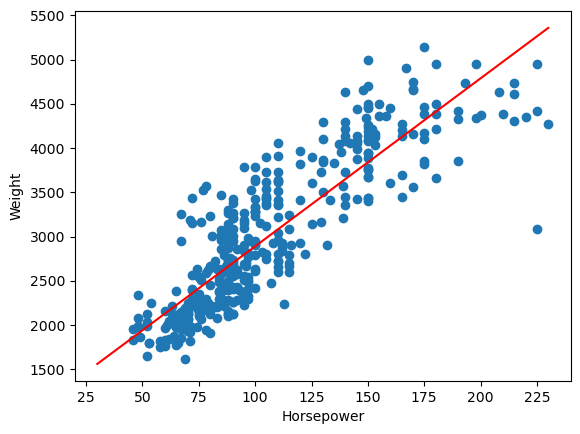

In [31]:
x1 = 30
x2 = 230
y1= pravac(x1)
y2 = pravac(x2)

plt.plot([x1, x2], [y1, y2], "-r")
plt.scatter(x=automobili.Horsepower, y=automobili.Weight)

plt.xlabel("Horsepower")
plt.ylabel("Weight")

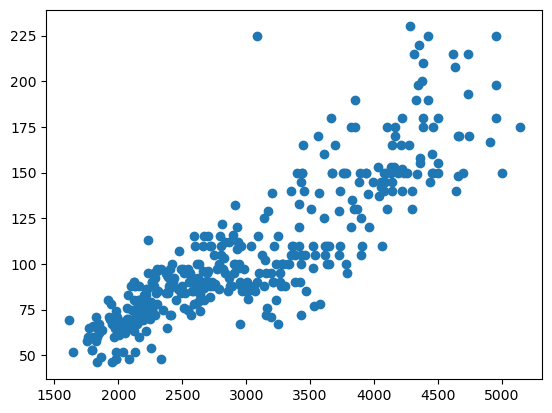

In [32]:
plt.scatter(x=automobili.Weight, y=automobili.Horsepower)

In [33]:
C = np.matrix(automobili.Weight).T
C

matrix([[3504.],
        [3693.],
        [3436.],
        [3433.],
        [3449.],
        [4341.],
        [4354.],
        [4312.],
        [4425.],
        [3850.],
        [3090.],
        [4142.],
        [4034.],
        [4166.],
        [3850.],
        [3563.],
        [3609.],
        [3353.],
        [3761.],
        [3086.],
        [2372.],
        [2833.],
        [2774.],
        [2587.],
        [2130.],
        [1835.],
        [2672.],
        [2430.],
        [2375.],
        [2234.],
        [2648.],
        [4615.],
        [4376.],
        [4382.],
        [4732.],
        [2130.],
        [2264.],
        [2228.],
        [1978.],
        [2634.],
        [3439.],
        [3329.],
        [3302.],
        [3288.],
        [4209.],
        [4464.],
        [4154.],
        [4096.],
        [4955.],
        [4746.],
        [5140.],
        [2962.],
        [2408.],
        [3282.],
        [3139.],
        [2220.],
        [2123.],
        [2074.],
        [2065.

In [34]:
D = np.matrix(automobili.Horsepower).T
D

matrix([[130.],
        [165.],
        [150.],
        [150.],
        [140.],
        [198.],
        [220.],
        [215.],
        [225.],
        [190.],
        [115.],
        [165.],
        [153.],
        [175.],
        [175.],
        [170.],
        [160.],
        [140.],
        [150.],
        [225.],
        [ 95.],
        [ 95.],
        [ 97.],
        [ 85.],
        [ 88.],
        [ 46.],
        [ 87.],
        [ 90.],
        [ 95.],
        [113.],
        [ 90.],
        [215.],
        [200.],
        [210.],
        [193.],
        [ 88.],
        [ 90.],
        [ 95.],
        [ 48.],
        [100.],
        [105.],
        [100.],
        [ 88.],
        [100.],
        [165.],
        [175.],
        [153.],
        [150.],
        [180.],
        [170.],
        [175.],
        [110.],
        [ 72.],
        [100.],
        [ 88.],
        [ 86.],
        [ 90.],
        [ 70.],
        [ 76.],
        [ 65.],
        [ 69.],
        [ 60.],
        

In [35]:
C_prosireni = np.hstack((C, np.ones(C.shape)))
C_prosireni

matrix([[3.504e+03, 1.000e+00],
        [3.693e+03, 1.000e+00],
        [3.436e+03, 1.000e+00],
        [3.433e+03, 1.000e+00],
        [3.449e+03, 1.000e+00],
        [4.341e+03, 1.000e+00],
        [4.354e+03, 1.000e+00],
        [4.312e+03, 1.000e+00],
        [4.425e+03, 1.000e+00],
        [3.850e+03, 1.000e+00],
        [3.090e+03, 1.000e+00],
        [4.142e+03, 1.000e+00],
        [4.034e+03, 1.000e+00],
        [4.166e+03, 1.000e+00],
        [3.850e+03, 1.000e+00],
        [3.563e+03, 1.000e+00],
        [3.609e+03, 1.000e+00],
        [3.353e+03, 1.000e+00],
        [3.761e+03, 1.000e+00],
        [3.086e+03, 1.000e+00],
        [2.372e+03, 1.000e+00],
        [2.833e+03, 1.000e+00],
        [2.774e+03, 1.000e+00],
        [2.587e+03, 1.000e+00],
        [2.130e+03, 1.000e+00],
        [1.835e+03, 1.000e+00],
        [2.672e+03, 1.000e+00],
        [2.430e+03, 1.000e+00],
        [2.375e+03, 1.000e+00],
        [2.234e+03, 1.000e+00],
        [2.648e+03, 1.000e+00],
        

In [36]:
psudoinverz_matrice_c_prosireno = np.linalg.inv(C_prosireni.T * C_prosireni) * C_prosireni.T
x_novi= psudoinverz_matrice_c_prosireno * D
x_novi

matrix([[  0.03955133],
        [-13.04012986]])

In [37]:
def pravac_novi(x_weight):
    return float(np.matrix([x_weight, 1])* x_novi)

C:\Users\brankor\AppData\Local\Temp\ipykernel_28248\1439103313.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(np.matrix([x_weight, 1])* x_novi)


Text(0.5, 0, 'Weight')

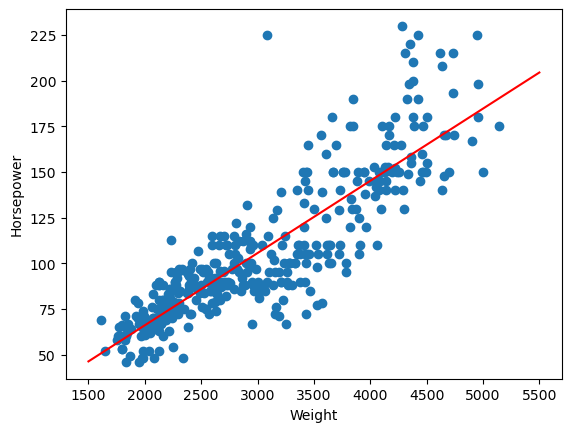

: 

In [ ]:
x1 = 1500
x2 = 5500
y1= pravac_novi(x1)
y2 = pravac_novi(x2)

plt.plot([x1, x2], [y1, y2], "-r")
plt.scatter(y=automobili.Horsepower, x=automobili.Weight)

plt.ylabel("Horsepower")
plt.xlabel("Weight")